# Health Insurance Cross Sell Prediction

**Predict Health Insurance Owners' who will be interested in Vehicle Insurance**

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the customers from past year will also be interested in Vehicle Insurance provided by the company.

**Objective**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

# 1. Prepare the problem

### Importing  Required Libreries

In [350]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sns.set_theme(style="darkgrid")

### Load dataset

In [351]:
data=pd.read_csv("health_insurance.csv")

In [352]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# 2. Summarize Data

In [353]:
#showing first 5 rows
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [354]:

# showing last 5 rows
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [355]:
# check datatypes, shape,null values
print(data.info())
print()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None

id                      0
Gender                  0
Age                     0
Driving_Licens

**Dataset has 381109 rows and 12 columns.**
**There is no missing values present in dataset.**


### Descriptive statistics

In [356]:
#Statistical Summary of Numeric Variables
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Data visualizations

##### Target Variable

<Axes: xlabel='Response', ylabel='count'>

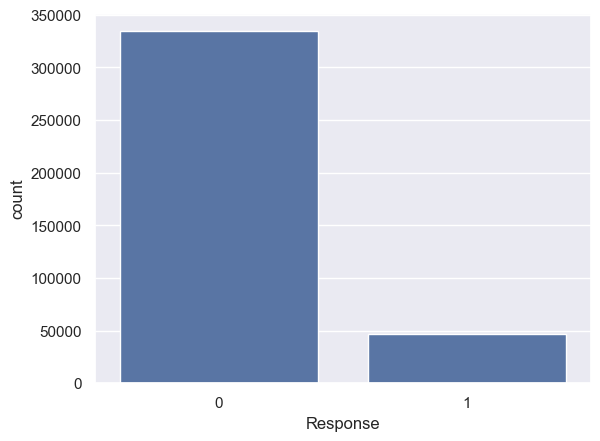

In [357]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Response', data=data)


* The data is highly imbalanced.

##### Gender

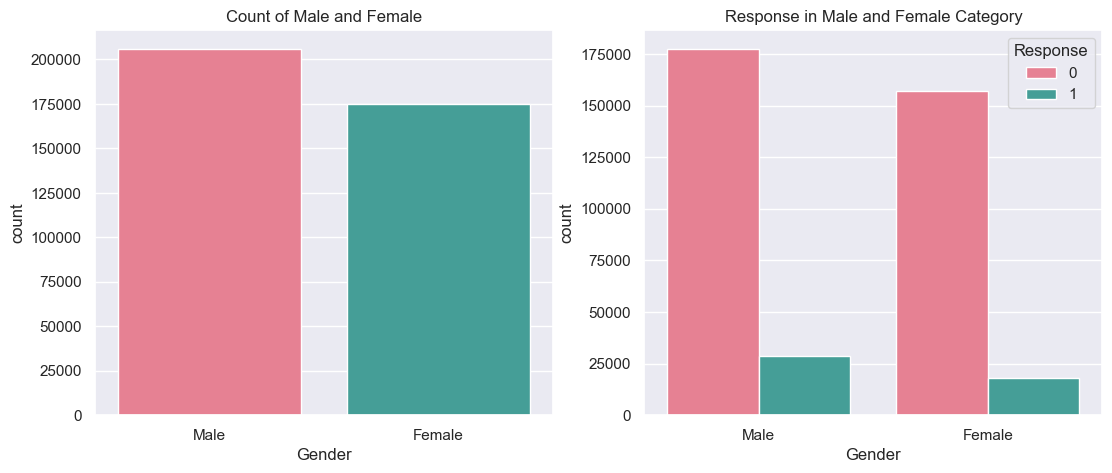

In [358]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.countplot(x='Gender', data=data, hue='Gender', palette='husl', legend=False)
plt.title("Count of Male and Female")

plt.subplot(1,2,2)
sns.countplot(x='Gender', hue='Response', data=data, palette='husl')
plt.title("Response in Male and Female Category")

plt.show()


* The gender variable in the dataset is almost equally distributed.
* Male category is slightly greater than that of female and chances of buying the insurance is also little high.

##### Age Vs Response

<Axes: xlabel='Age', ylabel='count'>

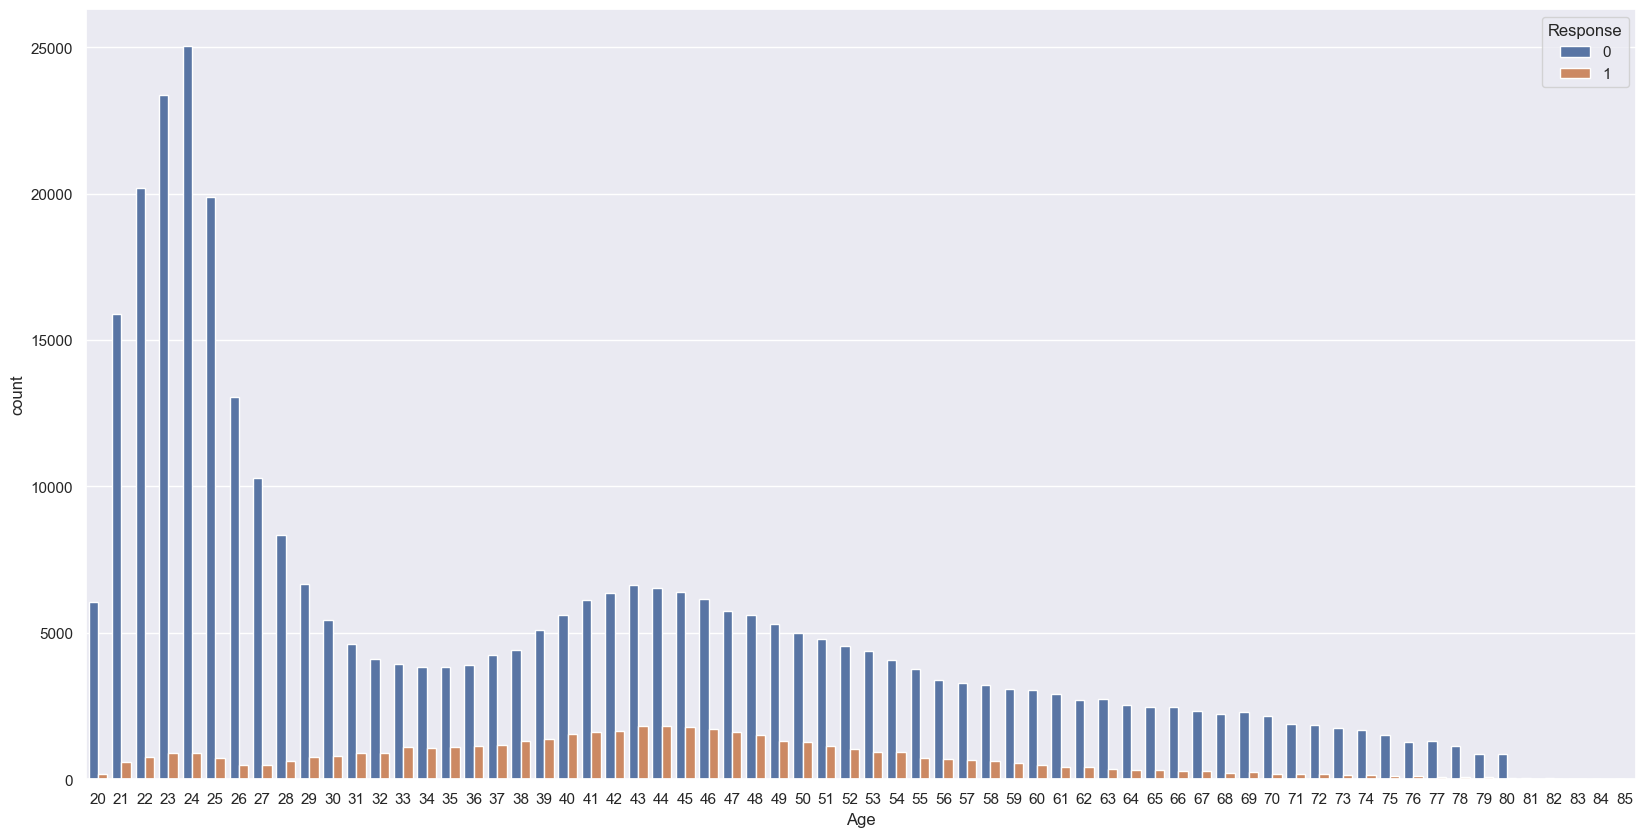

In [359]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=data)

<Axes: ylabel='Age'>

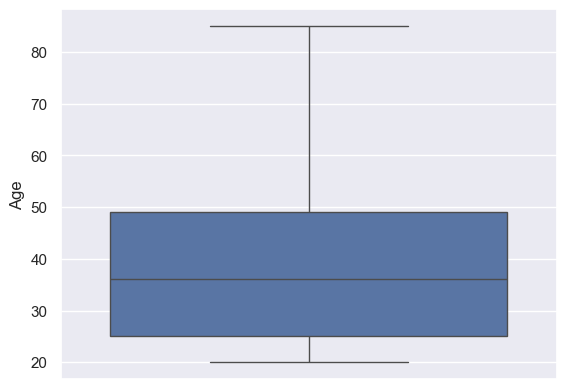

In [360]:
sns.boxplot(data['Age'])

* Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
* People aged between 30-60 are more likely to be interested.
* From the boxplot we can see that there no outlier in the data.

#### Driving License

In [361]:
print(data[data['Driving_License'] == 0]['Response'].value_counts())

0    771
1     41
Name: Response, dtype: int64


In [362]:
# Check rows where Driving_License is 0
print(data[data['Driving_License'] == 0])

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
563        564    Male   69                0         33.0                   0   
1061      1062    Male   71                0          3.0                   0   
1761      1762  Female   58                0         28.0                   0   
1990      1991    Male   66                0          8.0                   0   
2365      2366  Female   52                0         45.0                   1   
...        ...     ...  ...              ...          ...                 ...   
379869  379870    Male   65                0          8.0                   0   
380088  380089    Male   67                0         16.0                   0   
380537  380538    Male   57                0         28.0                   0   
380599  380600    Male   67                0         11.0                   1   
380917  380918    Male   68                0         31.0                   0   

       Vehicle_Age Vehicle_

<Axes: xlabel='Driving_License', ylabel='count'>

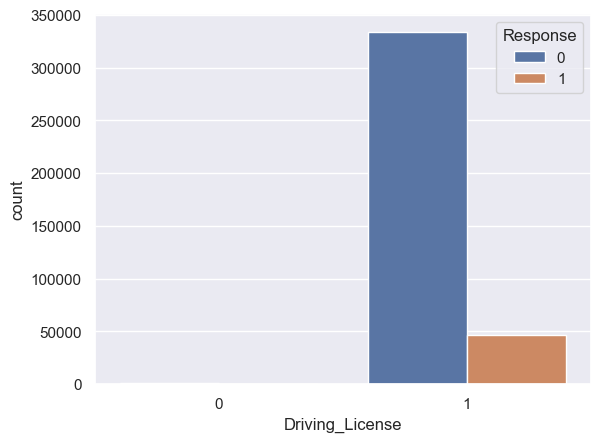

In [363]:
sns.countplot(x='Driving_License', hue='Response', data=data)


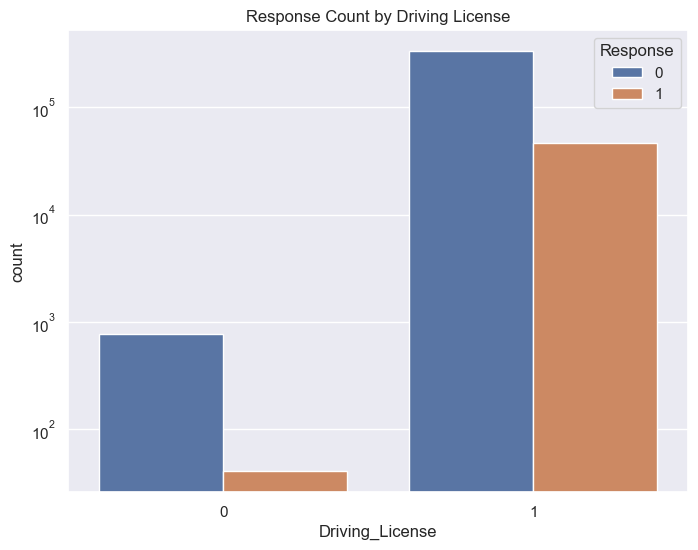

In [364]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Driving_License', hue='Response', data=data)
plt.yscale('log')  # 👈 Apply log scale to y-axis
plt.title("Response Count by Driving License")
plt.show()


* Customers who are interested in Vehicle Insurance almost all have driving license

##### Previously_Insured Vs Response

<Axes: xlabel='Previously_Insured', ylabel='count'>

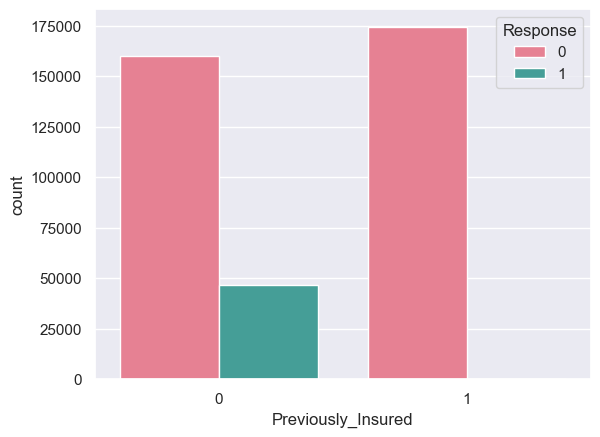

In [365]:
sns.countplot(x='Previously_Insured',hue='Response',data=data,palette='husl')

* Customer who are not perviosly insured are likely to be inetrested

##### Vehicle_Age Vs Response

<Axes: xlabel='Vehicle_Age', ylabel='count'>

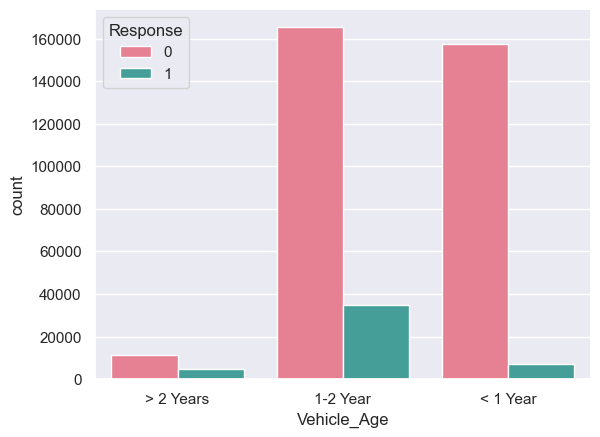

In [366]:
sns.countplot(x='Vehicle_Age',hue='Response',data=data,palette='husl')

* Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

* Customers with with Vehicle_Age <1 years have very less chance of buying Insurance

##### Annual_Premium


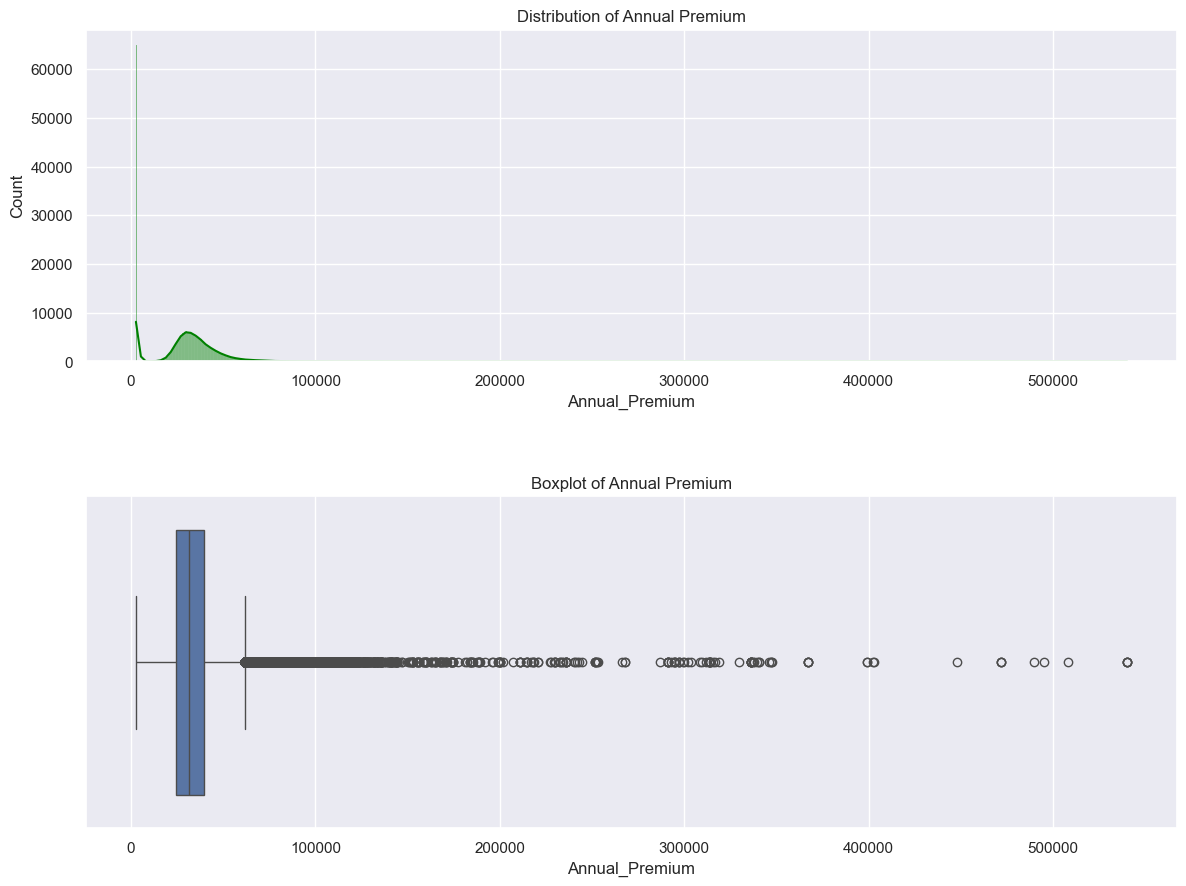

In [367]:
plt.figure(figsize=(13,10))  # Increase height
plt.subplot(2,1,1)
sns.histplot(data['Annual_Premium'], color='green', kde=True)
plt.title("Distribution of Annual Premium")
plt.tight_layout(pad=4.0)  # Add more padding

plt.subplot(2,1,2)
sns.boxplot(x=data['Annual_Premium'])
plt.title("Boxplot of Annual Premium")
plt.tight_layout(pad=4.0)
plt.show()



* From the distribution plot we can infer that the annual premimum variable is right skewed
* From the boxplot we can observe lot of outliers in the variable

##### Correlation Matrix

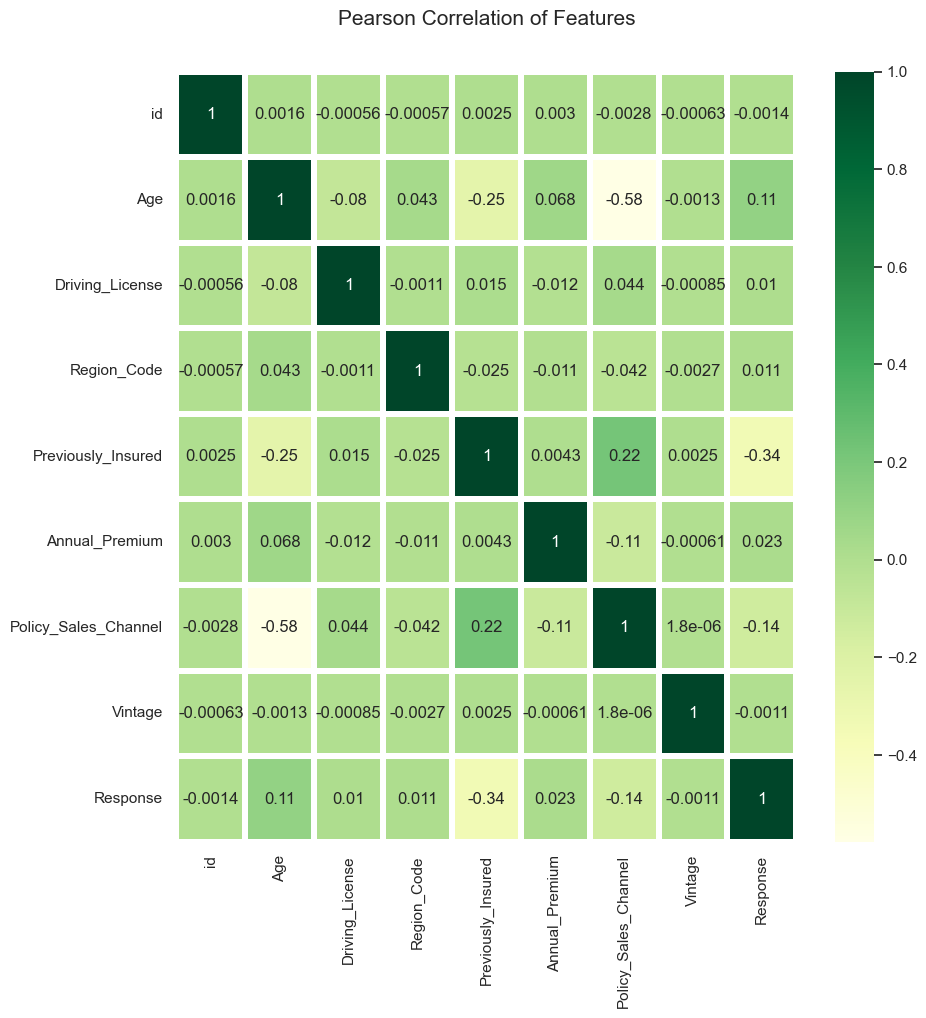

In [369]:
corr = data.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True, linewidths=3, cmap='YlGn')
plt.title("Pearson Correlation of Features", y=1.05, size=15)
plt.show()


*  Target variable is not much affected by Vintage variable. we can drop least correlated variable.

# 3. Prepare Data

##### Label encoding

In [370]:
data 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [371]:
data.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [372]:
# Manual mapping
vehicle_age_map = {
    "< 1 Year": 0,
    "1-2 Year": 1,
    "> 2 Years": 2
}

# Apply the mapping using .map()
data['Vehicle_Age'] = data['Vehicle_Age'].map(vehicle_age_map)

In [373]:
# Assuming: Male = 1, Female = 0 | Yes = 1, No = 0
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Vehicle_Damage'] = data['Vehicle_Damage'].map({'Yes': 1, 'No': 0})


In [374]:
# #changing categorical value to numerical values
# labelEncoder= LabelEncoder()
# data['Gender'] = labelEncoder.fit_transform(data['Gender'])
# data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [375]:
data.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

##### Checking duplicate rows

In [376]:
duplicate=data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


* there is no duplicated rows in the dataset

###### Seprating dependent and independent variables

In [377]:
x=data.drop(['Response'],axis=1) #contain all  independent variable
y=data['Response']           #dependent variable

In [378]:
x.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39


In [379]:
x[x['Driving_License'] == 0]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
563,564,1,69,0,33.0,0,1,1,39730.0,26.0,53
1061,1062,1,71,0,3.0,0,1,0,25323.0,26.0,179
1761,1762,0,58,0,28.0,0,1,1,53047.0,122.0,214
1990,1991,1,66,0,8.0,0,1,0,48063.0,25.0,231
2365,2366,0,52,0,45.0,1,1,0,33283.0,26.0,152
...,...,...,...,...,...,...,...,...,...,...,...
379869,379870,1,65,0,8.0,0,2,1,42230.0,26.0,65
380088,380089,1,67,0,16.0,0,2,1,28195.0,124.0,122
380537,380538,1,57,0,28.0,0,1,1,48647.0,122.0,144
380599,380600,1,67,0,11.0,1,1,0,36953.0,26.0,135


#### Feature Selection

In [380]:
x=x.drop(['id'],axis=1)
x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,1,76,1,3.0,0,1,0,33536.0,26.0,183
2,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,1,21,1,11.0,1,0,0,28619.0,152.0,203
4,0,29,1,41.0,1,0,0,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1,0,30170.0,26.0,88
381105,1,30,1,37.0,1,0,0,40016.0,152.0,131
381106,1,21,1,30.0,1,0,0,35118.0,160.0,161
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74


[0.00490552 0.14529517 0.00047765 0.10610132 0.05410586 0.01854646
 0.07629073 0.24700073 0.06990105 0.27737551]


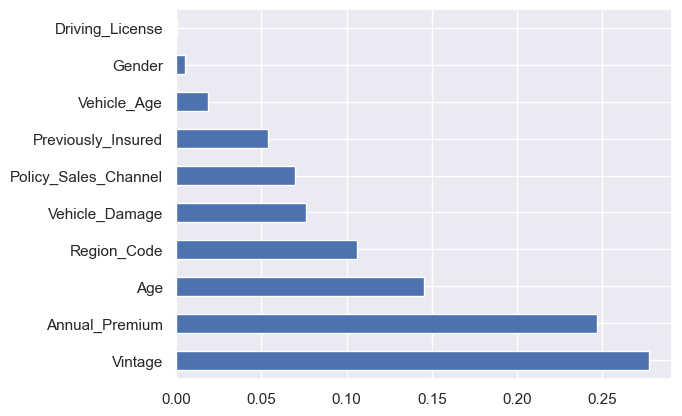

In [381]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [382]:
import scipy.stats as stats
import pandas as pd

contingency_table = pd.crosstab(data['Driving_License'], data['Response'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square Test p-value:", p)


Chi-square Test p-value: 5.111753504019177e-10


* We can remove less important features from the data set

In [305]:
# x=x.drop(['Driving_License','Gender'],axis=1)
# x

#### Handling Imbalanced data
*  When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 326179, 0: 326179})


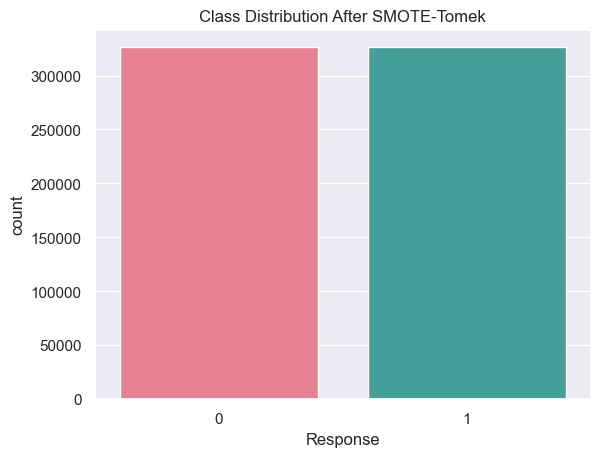

In [383]:
from imblearn.combine import SMOTETomek
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Apply SMOTE-Tomek
x_new, y_new = smote_tomek.fit_resample(x, y)

# Print the original and resampled dataset shapes
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

# Plot the class distribution after oversampling and Tomek link cleaning
sns.countplot(x=y_new, hue=y_new, palette='husl', legend=False)
plt.title("Class Distribution After SMOTE-Tomek")
plt.show()


#### spliting of data into train and test data

In [384]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(456650, 10) (195708, 10) (456650,) (195708,)


#4. Model Selection
* Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)

* Dataset has more than 300k records

* cannot go with SVM Classifier as it takes more time to train as dataset increase
* Idea is to start selection of models as:

       1.Logistic Regression

       2.Random Forest

       3.XGBClassifier

###  1.Logistic Regression





In [399]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

# Set or create the experiment by name
mlflow.set_experiment("logistic_regression_experiment")

with mlflow.start_run(run_name="logistic_reg_run"):
    # Train the model
    model = LogisticRegression()
    model.fit(xtrain, ytrain)

    # Make predictions
    pred = model.predict(xtest)
    lr_probability = model.predict_proba(xtest)[:,1]

    # Compute metrics
    acc_lr = accuracy_score(ytest, pred)
    recall_lr = recall_score(ytest, pred)
    precision_lr = precision_score(ytest, pred)
    f1score_lr = f1_score(ytest, pred)
    AUC_LR = roc_auc_score(ytest, lr_probability)

    # Log metrics
    mlflow.log_metric("accuracy", acc_lr)
    mlflow.log_metric("recall", recall_lr)
    mlflow.log_metric("precision", precision_lr)
    mlflow.log_metric("f1_score", f1score_lr)
    mlflow.log_metric("roc_auc_score", AUC_LR)

    # Log model
    mlflow.sklearn.log_model(model, "logistic_regression_model")

    print("Accuracy:", acc_lr)
    print("ROC_AUC Score:", AUC_LR)


2025/04/14 18:34:11 INFO mlflow.tracking.fluent: Experiment with name 'logistic_regression_experiment' does not exist. Creating a new experiment.
2025/04/14 18:34:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.7769380914423529
ROC_AUC Score: 0.8362244954361843
🏃 View run logistic_reg_run at: http://localhost:5000/#/experiments/909903084230282792/runs/ee7cddc520c44f419c8df8a38275653f
🧪 View experiment at: http://localhost:5000/#/experiments/909903084230282792


In [400]:

model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7769380914423529
ROC_AUC Score: 0.8226969638955456


In [401]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.59      0.94      0.73     61144
           1       0.97      0.70      0.81    134564

    accuracy                           0.78    195708
   macro avg       0.78      0.82      0.77    195708
weighted avg       0.85      0.78      0.79    195708



### ROC Curve


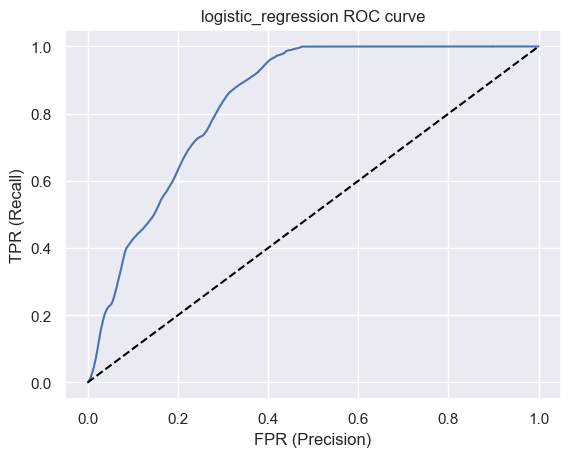

In [402]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('logistic_regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[57761 40272]
 [ 3383 94292]]


<Axes: >

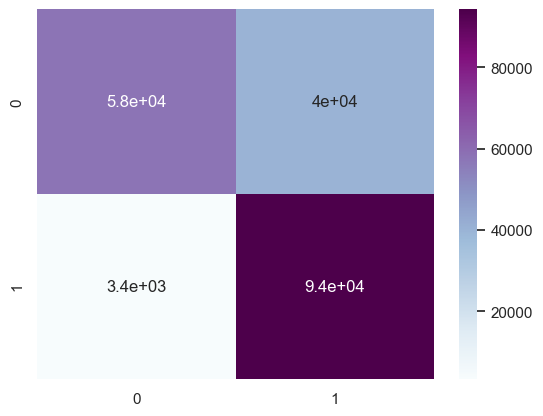

In [403]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

## 2.RandomForest Classifier

In [392]:
import mlflow
mlflow.set_tracking_uri("http://localhost:5000")

In [404]:


# Log metrics and model with MLflow
with mlflow.start_run(run_name="random_forest_run"):
    # Train the Random Forest model
    randomforest = RandomForestClassifier()
    randomforest = randomforest.fit(xtrain, ytrain)
    
    # Make predictions
    y_pred = randomforest.predict(xtest)
    RF_probability = randomforest.predict_proba(xtest)[:,1]
    
    # Compute metrics
    AUC_RF = roc_auc_score(ytest, RF_probability)  # Use probability for AUC calculation
    acc_rf = accuracy_score(ytest, y_pred)
    recall_rf = recall_score(ytest, y_pred)
    precision_rf = precision_score(ytest, y_pred)
    f1score_rf = f1_score(ytest, y_pred)

    # Log metrics to MLflow
    mlflow.log_metric("accuracy", acc_rf)
    mlflow.log_metric("recall", recall_rf)
    mlflow.log_metric("precision", precision_rf)
    mlflow.log_metric("f1_score", f1score_rf)
    mlflow.log_metric("roc_auc_score", AUC_RF)

    # Log the model
    mlflow.sklearn.log_model(randomforest, "random_forest_model")

    # Log model parameters
    mlflow.log_params({
    "n_estimators": randomforest.n_estimators,
    "max_depth": randomforest.max_depth,
    "min_samples_split": randomforest.min_samples_split,
    "min_samples_leaf": randomforest.min_samples_leaf,
    "criterion": randomforest.criterion
})

    # Print metrics
    print("Accuracy : ", acc_rf)
    print("ROC_AUC Score:", AUC_RF)


2025/04/14 18:37:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy :  0.8868007439654996
ROC_AUC Score: 0.9636554963963011
🏃 View run random_forest_run at: http://localhost:5000/#/experiments/909903084230282792/runs/b7257601503c45459ce6ab10f1b7ee78
🧪 View experiment at: http://localhost:5000/#/experiments/909903084230282792


In [405]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]



In [406]:
# Calculate metrics
AUC_RF = roc_auc_score(ytest, RF_probability)  # Use probabilities for AUC calculation
acc_rf = accuracy_score(ytest, y_pred)
recall_rf = recall_score(ytest, y_pred)
precision_rf = precision_score(ytest, y_pred)
f1score_rf = f1_score(ytest, y_pred)

# Print metrics rounded to two decimal places
print("Accuracy Score:", round(acc_rf, 2))
print("ROC AUC Score:", round(AUC_RF, 2))
print("Recall Score:", round(recall_rf, 2))
print("Precision Score:", round(precision_rf, 2))
print("F1 Score:", round(f1score_rf, 2))


Accuracy Score: 0.89
ROC AUC Score: 0.96
Recall Score: 0.91
Precision Score: 0.87
F1 Score: 0.89


In [407]:
import pickle

# Save model
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(randomforest, model_file)

# Save scaler (only if you used one)
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)


In [408]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     93470
           1       0.91      0.87      0.89    102238

    accuracy                           0.89    195708
   macro avg       0.89      0.89      0.89    195708
weighted avg       0.89      0.89      0.89    195708



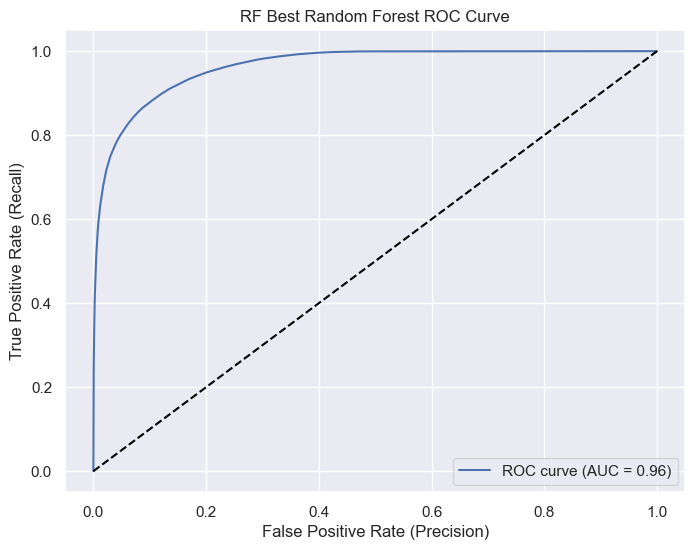

AUC Score: 0.96


In [318]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability predictions for the positive class (class 1)
RF_probability = randomforest.predict_proba(xtest)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

# Calculate the AUC score
roc_auc = roc_auc_score(ytest, RF_probability)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.title('RF Best Random Forest ROC Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], ls='--', color='black')  # Line of no-discrimination (diagonal)
plt.legend(loc='lower right')
plt.show()

# Optionally, print the AUC score
print(f"AUC Score: {roc_auc:.2f}")


### hyperparameter tuning for this random forest model

In [319]:
# import optuna 
# def objective(trial):
#     # Reduced range for faster tuning
#     n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
#     max_depth = trial.suggest_int("max_depth", 5, 30)
#     min_samples_split = trial.suggest_int("min_samples_split", 2, 5)
#     min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 4)
#     max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

#     rf = RandomForestClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         max_features=max_features,
#         random_state=42,
#         n_jobs=1  # Optional: sometimes faster on local systems
#     )

#     # Smaller sample of data
#     x_sample, _, y_sample, _ = train_test_split(xtrain, ytrain, train_size=0.3, stratify=ytrain, random_state=42)

#     rf.fit(x_sample, y_sample)
#     preds = rf.predict(xtest)
#     f1 = f1_score(ytest, preds)

#     # Optional pruning
#     trial.report(f1, step=0)
#     if trial.should_prune():
#         raise optuna.TrialPruned()

#     return f1

# study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
# study.optimize(objective, n_trials=10)

# # Extract the best hyperparameters from the study
# best_params = study.best_trial.params
# print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'n_estimators': 200, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None}
Accuracy: 0.9
Recall: 0.9
Precision: 0.89
F1 Score: 0.9
ROC AUC Score: 0.97

### training RF with the best hyper parameter

In [320]:


# Create a RandomForestClassifier model with the best parameters
rf_best = RandomForestClassifier(
    n_estimators= 200,
    max_depth= 28,
    min_samples_split= 4,
    min_samples_leaf= 4,
    max_features=None,
    random_state=42,
    n_jobs=-1  # If you want to use all cores
)

# Fit the model on the full training data
rf_best.fit(xtrain, ytrain)

# Make predictions and evaluate
y_pred = rf_best.predict(xtest)
RF_probability = rf_best.predict_proba(xtest)[:, 1]  # Probabilities for the positive class (class 1)

# Evaluate the model
AUC_RF = roc_auc_score(ytest, RF_probability)  # Use probabilities for AUC calculation
acc_rf = accuracy_score(ytest, y_pred)
recall_rf = recall_score(ytest, y_pred)
precision_rf = precision_score(ytest, y_pred)
f1score_rf = f1_score(ytest, y_pred)

# Print evaluation metrics rounded to two decimal places
print(f"Accuracy: {round(acc_rf, 2)}")
print(f"Recall: {round(recall_rf, 2)}")
print(f"Precision: {round(precision_rf, 2)}")
print(f"F1 Score: {round(f1score_rf, 2)}")
print(f"ROC AUC Score: {round(AUC_RF, 2)}")



Accuracy: 0.9
Recall: 0.9
Precision: 0.89
F1 Score: 0.9
ROC AUC Score: 0.97


In [321]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     97400
           1       0.90      0.89      0.90     98308

    accuracy                           0.90    195708
   macro avg       0.90      0.90      0.90    195708
weighted avg       0.90      0.90      0.90    195708



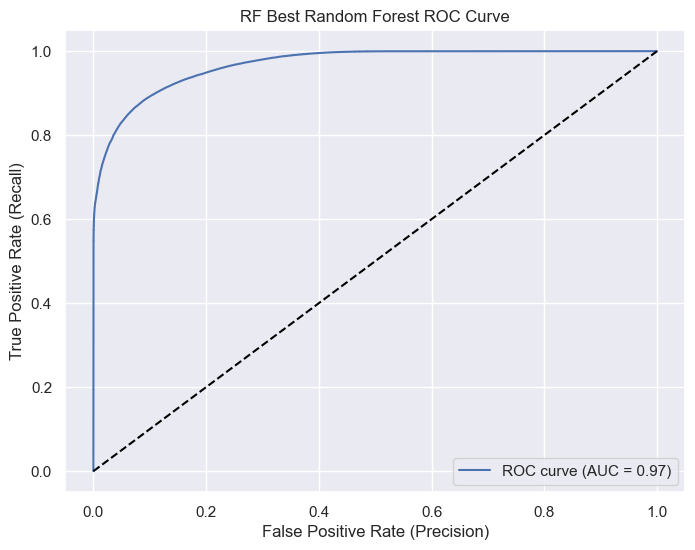

AUC Score: 0.97


In [322]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability predictions for the positive class (class 1)
RF_probability = rf_best.predict_proba(xtest)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

# Calculate the AUC score
roc_auc = roc_auc_score(ytest, RF_probability)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.title('RF Best Random Forest ROC Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], ls='--', color='black')  # Line of no-discrimination (diagonal)
plt.legend(loc='lower right')
plt.show()

# Optionally, print the AUC score
print(f"AUC Score: {roc_auc:.2f}")


In [323]:
import pickle

# Save model
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(rf_best, model_file)

# Save scaler (only if you used one)
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)


[[87460  9940]
 [10573 87735]]


<Axes: >

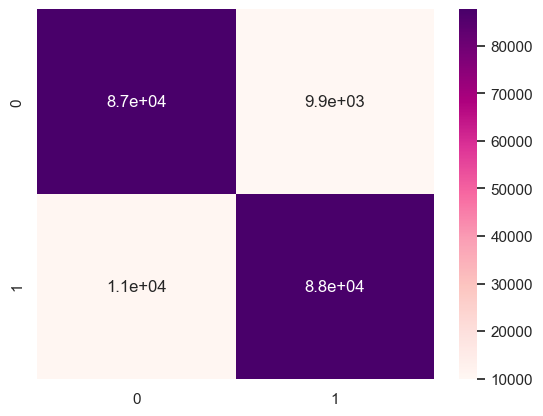

In [324]:
cm=confusion_matrix(y_pred,ytest)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

## 3. XGBClassifier

In [325]:
from xgboost import XGBClassifier

# Log metrics and model with MLflow
with mlflow.start_run(run_name="xgboost_run"):
    # Train the XGBoost model
    xgb = XGBClassifier()
    XGB_fit = xgb.fit(xtrain, ytrain)
    
    # Make predictions
    y_predict = XGB_fit.predict(xtest)
    XGB_probability = XGB_fit.predict_proba(xtest)[:,1]
    
    # Compute metrics
    acc_xgb = accuracy_score(ytest, y_predict)
    recall_xgb = recall_score(ytest, y_predict)
    precision_xgb = precision_score(ytest, y_predict)
    f1score_xgb = f1_score(ytest, y_predict)
    AUC_xgb = roc_auc_score(ytest, XGB_probability)  # Use probability for AUC calculation
    
    # Log metrics to MLflow
    mlflow.log_metric("accuracy", acc_xgb)
    mlflow.log_metric("recall", recall_xgb)
    mlflow.log_metric("precision", precision_xgb)
    mlflow.log_metric("f1_score", f1score_xgb)
    mlflow.log_metric("roc_auc_score", AUC_xgb)

    # Log the model
    mlflow.sklearn.log_model(XGB_fit, "xgboost_model")

    # Print metrics
    print("Accuracy : ", acc_xgb)
    print("ROC_AUC Score:", AUC_xgb)


2025/04/14 15:28:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy :  0.866954851104707
ROC_AUC Score: 0.9528842206937358


In [326]:

xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

acc_xgb=accuracy_score(ytest,y_predict)
recall_xgb=recall_score(ytest,y_predict)
precision_xgb=precision_score(ytest,y_predict)
f1score_xgb=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.866954851104707
ROC_AUC Score: 0.8684566440811028


In [327]:
print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     91727
           1       0.90      0.84      0.87    103981

    accuracy                           0.87    195708
   macro avg       0.87      0.87      0.87    195708
weighted avg       0.87      0.87      0.87    195708



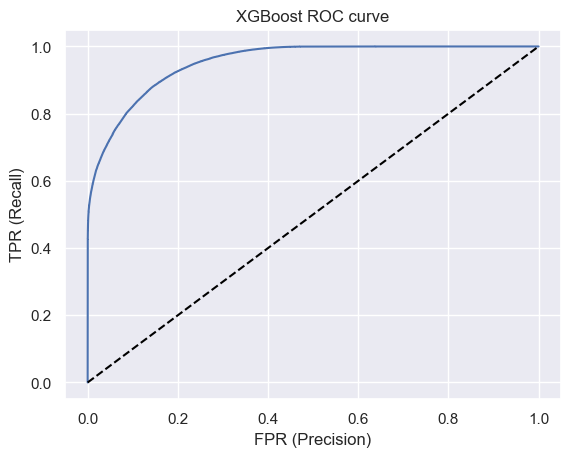

In [328]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[81861 16172]
 [ 9866 87809]]


<Axes: >

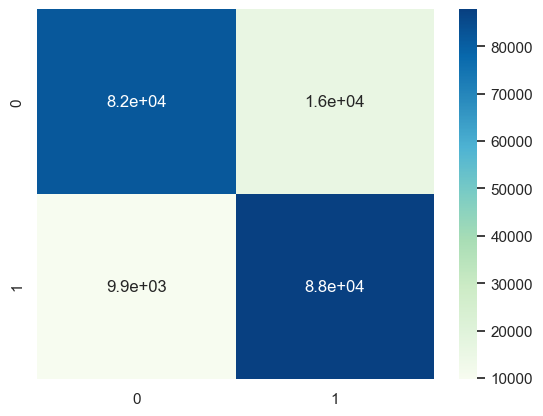

In [329]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(ytest,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

## Comparing the model

In [330]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result


,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.776938,0.965365,0.700722,0.812026,0.822697
Randomforest,0.895186,0.898234,0.892450,0.895333,0.968549
XGBClassifier,0.866955,0.898992,0.844472,0.870879,0.868457


The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier.

# Conclusion

* Customers of age between 30 to 60 are more likely to buy insurance.
* Customers with Driving License have higher chance of buying Insurance.
* Customers with Vehicle_Damage are likely to buy insurance.
*  The variable such as Age, Previously_insured,Annual_premium  are more afecting the target variable.
* comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.


In [331]:
import joblib

# Load the model and scaler
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Example usage
# X_scaled = scaler.transform(X)
# predictions = model.predict(X_scaled)


In [345]:
# 1111111111111111111111111111111111111111111111111 class
# data = {
#     "Gender": "Female",
#     "Age": 47,
#     "Driving_License": 1,
#     "Region_Code": 35.0,
#     "Previously_Insured": 0,
#     "Vehicle_Age": "1-2 Year",
#     "Vehicle_Damage": "Yes",
#     "Annual_Premium": 47576.0,
#     "Policy_Sales_Channel": 124.0,
#     "Vintage": 46,
   
# }
# data = {
#     "Gender": "Male",
#     "Age": 37,
#     "Driving_License": 1,
#     "Region_Code": 6.0,
#     "Previously_Insured": 0,
#     "Vehicle_Age": "1-2 Year",
#     "Vehicle_Damage": "Yes",
#     "Annual_Premium": 2630.0,
#     "Policy_Sales_Channel": 156.0,
#     "Vintage": 147
# }

data = {
    "Gender": "Male",
    "Age": 76,
    "Driving_License": 1,
    "Region_Code": 3.0,
    "Previously_Insured": 0,
    "Vehicle_Age": "1-2 Year",
    "Vehicle_Damage": "No",
    "Annual_Premium": 33536.0,
    "Policy_Sales_Channel": 26.0,
    "Vintage": 183
}


data = pd.DataFrame([data])


In [349]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Load the model and scaler
model = joblib.load('model/random_forest_model.pkl')
scaler = joblib.load('model/scaler.pkl')

# 2. Input raw data (from your example)
data = {
    "Gender": "Male",
    "Age": 76,
    "Driving_License": 1,
    "Region_Code": 3.0,
    "Previously_Insured": 0,
    "Vehicle_Age": "1-2 Year",
    "Vehicle_Damage": "No",
    "Annual_Premium": 33536.0,
    "Policy_Sales_Channel": 26.0,
    "Vintage": 183
}


data = pd.DataFrame([data])

# 3. Manual mapping for Vehicle_Age
vehicle_age_map = {
    "< 1 Year": 0,
    "1-2 Year": 1,
    "> 2 Years": 2
}
data['Vehicle_Age'] = data['Vehicle_Age'].map(vehicle_age_map)

# Assuming: Male = 1, Female = 0 | Yes = 1, No = 0
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Vehicle_Damage'] = data['Vehicle_Damage'].map({'Yes': 1, 'No': 0})


# 5. Scale the input using pre-fitted scaler
data_scaled = scaler.transform(data)

# 6. Make prediction
prediction = model.predict(data_scaled)
prediction_proba = model.predict_proba(data_scaled)  # Optional: for probability

# 7. Output
print("Predicted Response:", prediction[0])
print("Probability of Response = 1:", prediction_proba[0][1])


Predicted Response: 0
Probability of Response = 1: 0.01567243867243867


In [343]:
data=pd.read_csv("health_insurance.csv")

In [344]:
data[data.Response == 0]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
